In [1]:
# 確率過程

# 各t∈[0,∞)に対して、確率変数Xtが与えられた時に、X=(Xt):t>=0を「確率過程」という
# 添え字tは時間を表すことが多く、tがt∈[0,∞)のように連続値をとりうる場合には、Xを特に連続確率過程とよぶ。
# 要するに時間などの条件によって変化する確率変数の数理モデルのこと
# 確率過程X=(Xt):t>=0が与えられたとき、その実現値の集合を(xt):t>0とかくと、
# t->xtなるtの関数が描かれる。これをXの「パス」という。連続的なもの不連続なもの様々ある 

In [2]:
# 独立定常増分

# 確率過程X=(Xt):t>=0が以下の(1)(2)を満たすとする
# (1)任意の0 = t0<t1<t2<..<tに対して、Xt0, Xt1-Xt0, Xtn-Xtn-1が互いに独立である(独立増分性) 
# (2)任意の0<=t<=t+hに対して、Xt+h-Xtの分布は、Xh-X0の分布と同一である(定常増分性)
# このような確率過程Xを「独立定常増分過程」という

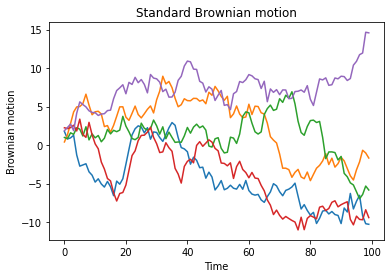

In [5]:
# ブラウン運動

# B0=0なる確率過程B=(Bt):t>=0が以下の(1)~(3)の性質を満たすとき、Bを「ブラウン運動」という
# (1)Bは独立定常増である
# (2)各t>=0に対して、Bt～N(u*t, σ^2*t)
# (3)Bのパスが連続である
# 特にu=0, σ^2=1となるものを「標準ブラウン運動」または「ウィナー過程」という
# ブラウン運動に対して、0 = t0<t1<t2<..<t=1なる[0,1]の分割をとる
# ただし、tk=k/n(k=0,1,..,n)とする。このとき各kに対して、Σεi, εi=Bti-Bti-1 のように表すことができて、
# ブラウン運動の定義によりεiは独立にN(μ/n, σ**2/n)に従う
# 点列Bt0(=0), Bt1,Bt2,..,Btnらはブラウン運動のパスの一部であり、確率変数列(εi)の和(「ランダムウォーク」)になっている

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

myu, sigma = 0, 1.0 # 標準ブラウン運動
x = np.arange(0,100,1)
y = np.zeros([x.shape[0],5])

y[0,:] = stats.norm.rvs(myu, sigma, size=5)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(myu, sigma, size=5)

for i in range(y.shape[1]):
    plt.plot(x,y[:,i])

plt.title("Standard Brownian motion")
plt.xlabel("Time")
plt.ylabel("Brownian motion")
plt.show() # 確率変数列の和(ランダムウォーク)を表示

In [15]:
# ブラウン運動のパラメータ推定

# ブラウン運動は時間に関して連続的なパスを持つが、応用上このようなモデルを用いるとき、
# その観測データは時間に関して離散的に観測されることが通常である
# そこでBt~N(μ*t, σ**2*t)なるブラウン運動B=(Bt):t>=0のパスを時間間隔Δ>0で観測し、
# データの観測データからuとσ^2を推定するB0,BΔ,B2Δ,..,BnΔを得たと仮定して、パラメータμ,σ**2を推定することを考える
# ブラウン運動の定常増分性によりZk=BkΔ-B(k-1)Δ~N(μ*Δ,σ**2*Δ)らは独立であるから、
# Zkをデータとする最尤法でパラメータ推定を実行する

# 推定したいパラメータ
myu, sigma = 1.0, 1.0
x = np.arange(0,1000,1)
y = np.zeros([x.shape[0],1])

# 上記のパラメータで観測データを生成
y[0,:] = stats.norm.rvs(myu, sigma, size=1)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.norm.rvs(myu,sigma,size=1)

# パラメータを推定(ブラウン運動が正規分布に従うことを利用)
diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

# BkΔ-BkΔ-1の平均
mu_estimate = np.mean(diff, axis=0) 
# 分散の公式を利用(E[X**2]-(E[X])**2)
sigma2_estimate = np.mean(diff**2, axis=0) - mu_estimate**2 

# 最尤推定量
print(f"推定値μ:{mu_estimate}")
print(f"推定値σ:{sigma2_estimate}")

推定値μ:[1.03661721]
推定値σ:[0.95362625]


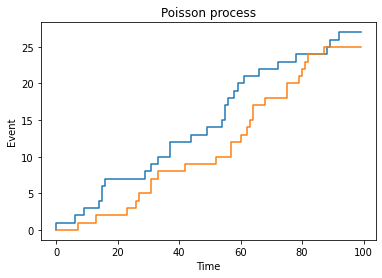

In [34]:
# ポアソン過程

# 各tで自然数値をとるような確率過程N=(Nt):t>=0を考え、N0=0とする。
# このNが以下の(1)(2)の性質を満たすとき、強度λの「ポアソン過程」という
# (1)Nは独立定常増である
# (2)各t>=0に対してNtは強度λtのポアソン分布に従う
# ポアソン過程は連続時間確率過程であるが、自然数にしか値をとらない階差型のパスを持ち
# 応用上は何らかのイベントの回数を表すモデルとして用いられることが多い

lamb = 0.3
path_num = 2
x = np.arange(0,100,1) # 経過時間
y = np.zeros([x.shape[0], path_num]) # イベント発生回数

y[0,:] = stats.poisson.rvs(lamb, size=path_num)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb, size=path_num)

x_ = np.repeat(x,2)
y_ = np.zeros([200,path_num])
for i in range(1,200):
    y_[i,:] = y[(i-1)//2,:]

for i in range(y.shape[1]):
    plt.plot(x_,y_[:,i])

plt.title("Poisson process")
plt.xlabel("Time")
plt.ylabel("Event")
plt.show() # 階段型のパスになる

In [17]:
# 計数過程としての表現

# 正値確率数列T = (Tk):k=1,2,..が、自然数kに対してTk<Tk+1を満たすとしT0=0とする
# これを用いて確率過程N = (Nt):t>=0を Nt = ΣI(Tk<=t) と定める
# ただし、I(A)はイベントAが起こったとき1、起こらなければ0をとる定義関数である
# このようなNをTから定めるNの「計数過程」または「点過程」という

In [46]:
# ポアソン過程のパラメータ推定

# 強度λを持つポアソン過程のパラメータを推定するにあたり、以下の2種類のデータ形式を考える
# (1)イベントの起こった時刻T1,T2,..,Tnを観測する
# (2)時間間隔Δ>0によってデータN0,NΔ,N1Δ,..,NnΔを観測する
# (1)の形式では各イベント発生の正確な時刻が観測されるのに対し、
# (2)の形式ではイベントの正確な時刻は観測されず、その回数しかわからない。
# それぞれの場合に応じて推定方法は異なる

# (1)の場合の推定
# Wk = Tk-Tk-1として、データW1,W2,..,Wnに変換すれば、
# これらは平均1/λの指数分布に従うことを利用して最尤推定量を求める

lamb = 0.4 # 推測したいパラメータ
x = np.arange(0,1000,1)
y = np.zeros([x.shape[0],1])

# 観測データを生成
y[0,:] = stats.expon.rvs(1/lamb, size=1)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.expon.rvs(1/lamb, size=1)

# Wk
diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

# ΣWk
lambda_estimate = 1/np.mean(diff, axis=0)

# 最尤推定量
print(f"推定量λ:{lambda_estimate}")

推定量λ:[0.28359266]


In [47]:
# (2)の場合の推定
# Mk = NkΔ-N(k-1)Δとして、データをM1,..,Mnに変換すると、ポアソン過程の独立定常増分性により、
# これらは独立にMk~Po(λ*Δ)となる。このことを利用して最尤推定量を求める

lamb = 0.4 # 推測したいパラメータ
x = np.arange(0,1000,1)
y = np.zeros([x.shape[0],1])

# 観測データを生成
y[0,:] = stats.poisson.rvs(lamb, size=1)
for i in range(x.shape[0]-1):
    y[i+1,:] = y[i,:] + stats.poisson.rvs(lamb,size=1)

# Mk
diff = y
diff[1:diff.shape[0],:] = diff[1:diff.shape[0],:] - diff[0:(diff.shape[0]-1),:]

lambda_estimate = np.mean(diff, axis=0)

# 最尤推定量
print(f"推定量λ:{lambda_estimate}")

推定量λ:[0.392]


In [49]:
# 複合ポアソン過程

# Xt = ΣUk のような確率過程X = (Xt):t>=0は「複合ポアソン過程」という
# ただし、N = (Nt):t>=0はポアソン過程で、Ukは互いに独立に同一の分布に従う
# 確率変数列で、Nとも独立する。特にUk≡1ならば、Xはポアソン過程である
# 要するに、第k回目のイベント発生に対応する何らかの量Ukの累積和を表すモデルである
# たとえば、時刻tまでの地震発生回数をNtというポアソン過程で表すとき、k回目の地震発生時の
# 損害額をUkとすると、Xtは時刻tまでの自身による総損害額を表すことができる